In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_2 as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib_2' from 'C:\\Users\\Saad J\\Desktop\\epri\\Oct20_EPRI\\Task2\\NB\\epri_mc_lib_2.py'>

In [10]:
df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_FT_TEP_UT_on_ID.csv'),
                    index_col=0)

sampled_df=pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_up.csv'))

In [11]:
df.index = df.index.str.rstrip('-12345')
df = df.groupby('ID').mean()
#df['log_MS_Avg'] = np.log(df['MS_Avg'])
#df['log_beta_avg'] = np.log(df['Beta_avg']) 
df = df[['KJIC', 'MS_Avg', 'TEP_average', 'Beta_avg', 'IF_amp_2.25MHz', 'IF_amp_3.5MHz','BS_amp']]



#sampled_df['log_MS_Avg'] = np.log(sampled_df['MS_Avg'])
#sampled_df['log_beta_avg'] = np.log(sampled_df['Beta_avg']) 
sampled_df=sampled_df[['KJIC', 'MS_Avg', 'TEP_average', 'Beta_avg', 'IF_amp_2.25MHz', 'IF_amp_3.5MHz','BS_amp']]


In [12]:
df.head()

,KJIC,MS_Avg,TEP_average,Beta_avg,IF_amp_2.25MHz,IF_amp_3.5MHz,BS_amp
ID,,,,,,,
304-0,162.000,0.120,-1.547,0.002743,0.46,0.4,11.1
304-20,105.780,0.496,-1.322,0.002093,0.69,0.6,9.8
304-40,100.700,1.350,-1.216,0.001941,0.72,0.6,8.9
304-60,91.320,1.371,-1.249,0.002567,0.91,0.8,11.4
304-80,73.775,3.966,-0.976,0.002420,0.89,0.9,12.2


In [13]:
sampled_df.head()

,KJIC,MS_Avg,TEP_average,Beta_avg,IF_amp_2.25MHz,IF_amp_3.5MHz,BS_amp
0,104.509264,1.065855,-1.381644,0.001991,0.834178,0.572778,7.903716
1,121.243211,0.527884,-1.338246,0.002014,0.790009,0.514249,9.467436
2,79.715363,0.043292,-1.726655,0.002272,0.905257,0.889712,4.245708
3,64.051840,0.019697,-1.617859,0.002848,0.743794,0.568634,13.192833
4,73.157311,1.674169,-1.163593,0.002355,0.936776,0.734233,10.842438


### Boxplots for real and sampled data

In [14]:
data1 = df.drop(['KJIC'],axis=1).assign(Location="Real_Data")
data2 = sampled_df.drop(['KJIC'], axis=1).assign(Location="Simulated_Data")

In [15]:
cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])
print(mdf)

            Location Feature      value
0          Real_Data  MS_Avg   0.120000
1          Real_Data  MS_Avg   0.496000
2          Real_Data  MS_Avg   1.350000
3          Real_Data  MS_Avg   1.371000
4          Real_Data  MS_Avg   3.966000
...              ...     ...        ...
6115  Simulated_Data  BS_amp   8.944160
6116  Simulated_Data  BS_amp  11.757315
6117  Simulated_Data  BS_amp   8.618148
6118  Simulated_Data  BS_amp   9.722967
6119  Simulated_Data  BS_amp   5.340487

[6120 rows x 3 columns]


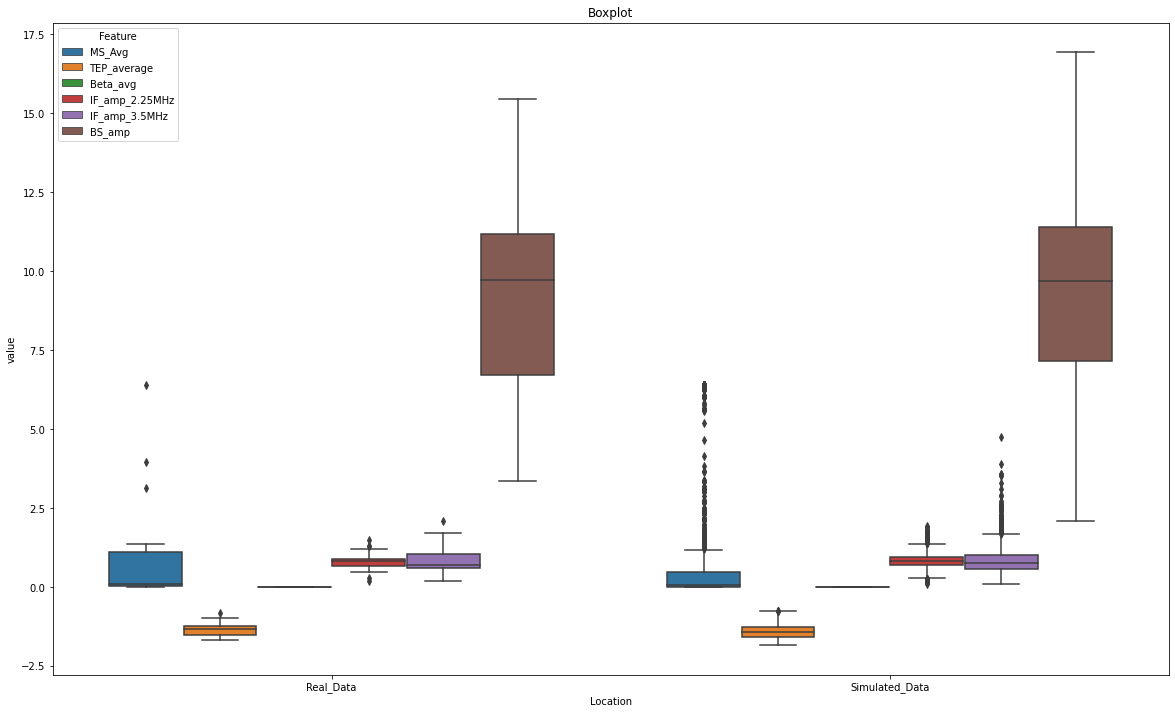

In [16]:
fig= plt.figure(figsize=(20, 12))
ax = sns.boxplot(x="Location", y="value", hue="Feature", data=mdf)    
plt.title('Boxplot')
plt.show()

In [17]:
my_pal = {"Real_Data": "r", "Simulated_Data": "tab:grey"}

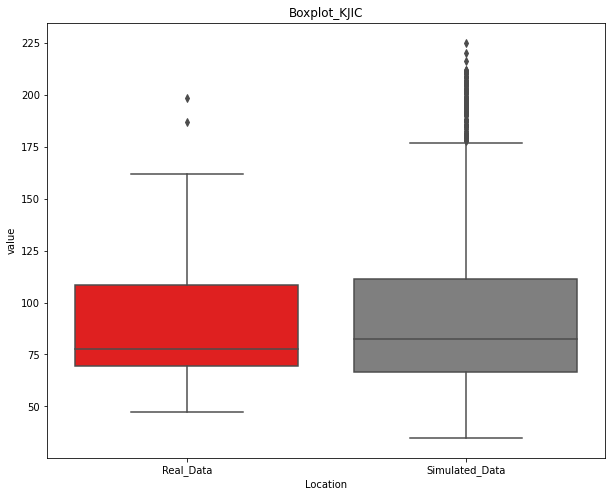

In [81]:
data1 = df[['KJIC']].assign(Location="Real_Data")
data2 = sampled_df[['KJIC']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_KJIC')
plt.show()

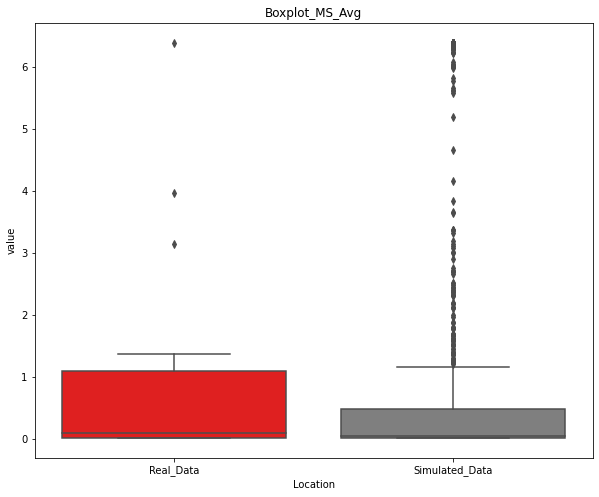

In [18]:
data1 = df[['MS_Avg']].assign(Location="Real_Data")
data2 = sampled_df[['MS_Avg']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_MS_Avg')
plt.show()

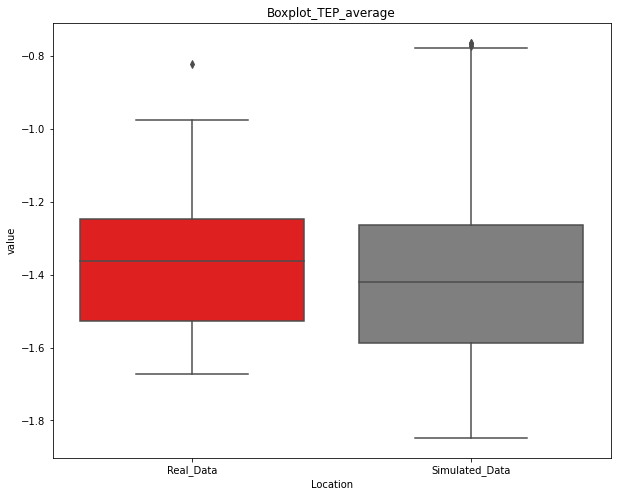

In [83]:
data1 = df[['TEP_average']].assign(Location="Real_Data")
data2 = sampled_df[['TEP_average']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_TEP_average')
plt.show()

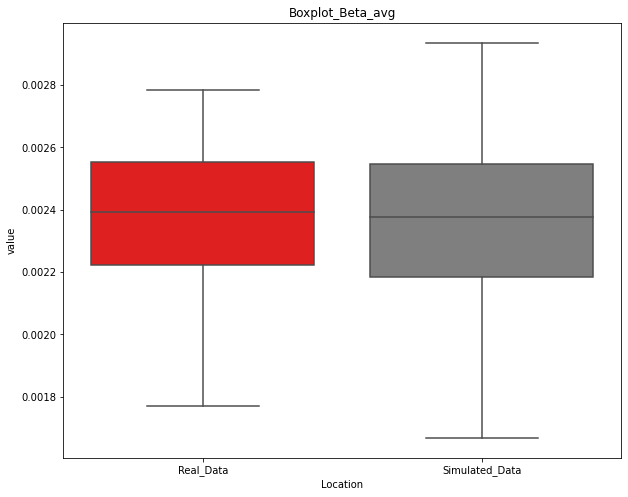

In [19]:
data1 = df[['Beta_avg']].assign(Location="Real_Data")
data2 = sampled_df[['Beta_avg']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_Beta_avg')
plt.show()

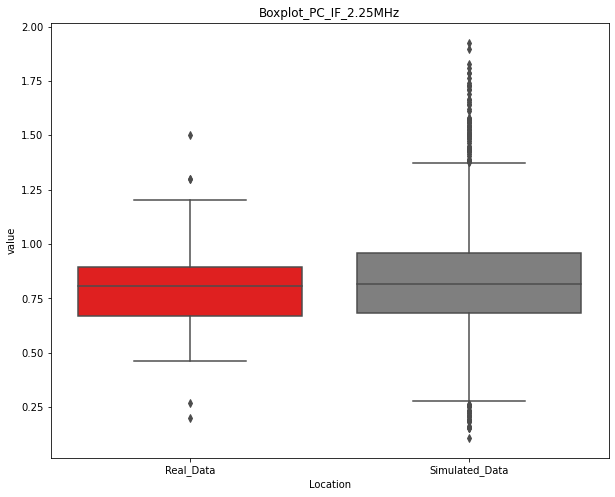

In [20]:
data1 = df[['IF_amp_2.25MHz']].assign(Location="Real_Data")
data2 = sampled_df[['IF_amp_2.25MHz']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_PC_IF_2.25MHz')
plt.show()

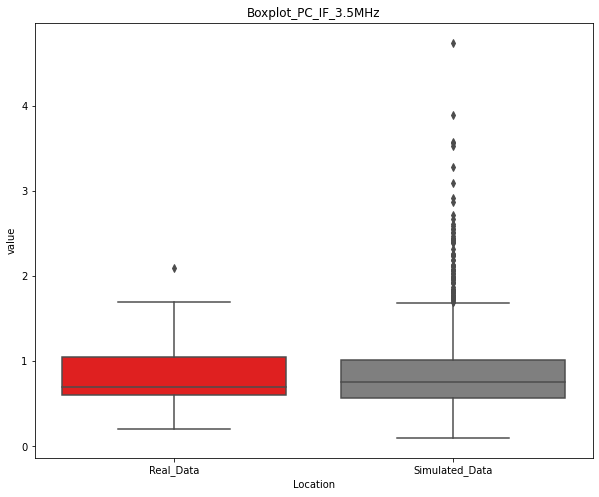

In [21]:
data1 = df[['IF_amp_3.5MHz']].assign(Location="Real_Data")
data2 = sampled_df[['IF_amp_3.5MHz']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf,  palette=my_pal)    
plt.title('Boxplot_PC_IF_3.5MHz')
plt.show()

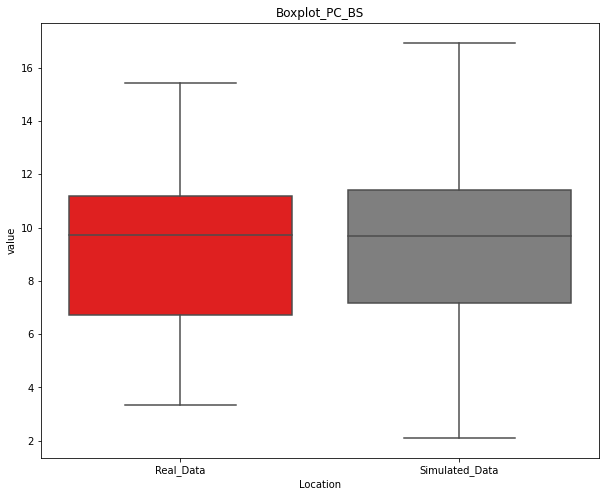

In [22]:
data1 = df[['BS_amp']].assign(Location="Real_Data")
data2 = sampled_df[['BS_amp']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf, palette=my_pal)    
plt.title('Boxplot_PC_BS')
plt.show()

### Scatter plots 

<Figure size 720x432 with 0 Axes>

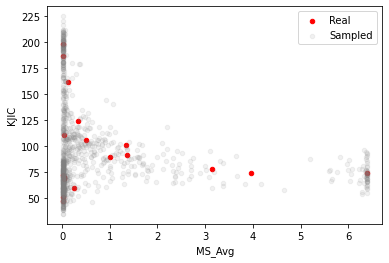

<Figure size 720x432 with 0 Axes>

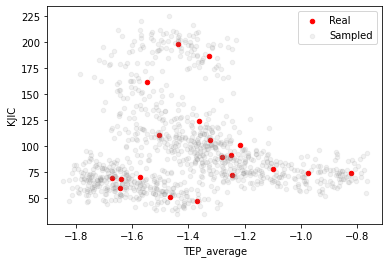

<Figure size 720x432 with 0 Axes>

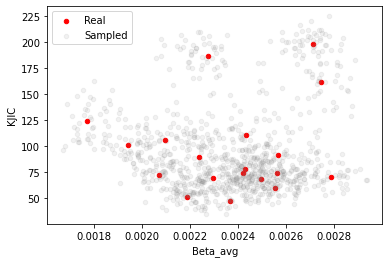

<Figure size 720x432 with 0 Axes>

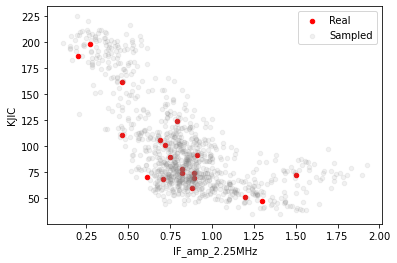

<Figure size 720x432 with 0 Axes>

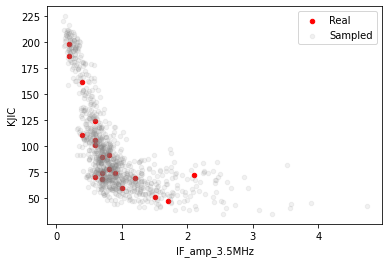

<Figure size 720x432 with 0 Axes>

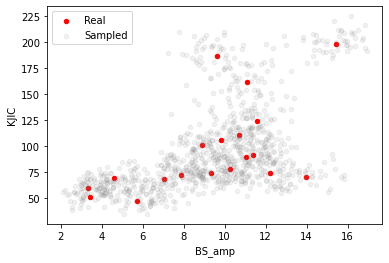

In [23]:


fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='MS_Avg', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='MS_Avg', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)    
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='TEP_average', y='KJIC', color='r',label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='TEP_average', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)  
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='Beta_avg', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='Beta_avg', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)  
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='IF_amp_2.25MHz', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='IF_amp_2.25MHz', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='IF_amp_3.5MHz', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='IF_amp_3.5MHz', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = df.plot(kind='scatter', x='BS_amp', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='BS_amp', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()
